# Spam E-Mail Classifier

With the increase in the number of internet users the internet threats has also been increased. One such case is E-Mail spamming which is used in internet fraud. This model will help us to classify the emails and detect spam emails and thus prevent the users such fraudulent acts. 

## Importing Libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Import Dataset

Data source: https://www.kaggle.com/balakishan77/spam-or-ham-email-classification




In [15]:
data = pd.read_csv('spamham.csv')

In [16]:
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


## Data Pre-processing

In [17]:
from sklearn.utils import shuffle
data = shuffle(data)

In [18]:
data.head()

,text,spam
121,Subject: re : ink prices got you down ? 11956 ...,1
3701,Subject: thank you ! fyi from valeria . - - ...,0
128,"Subject: localized software , all languages av...",1
860,Subject: perfect visual solution for your busi...,1
5063,Subject: summer intern we can hire the person...,0


In [19]:
data.drop_duplicates(inplace = True)

In [20]:
data.shape

(5695, 2)

In [21]:
data.isnull().sum()

text    0
spam    0
dtype: int64

In [22]:
data.groupby('spam').count()

,text
spam,
0,4327
1,1368


Plot of Spam Vs Not Spam emails

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


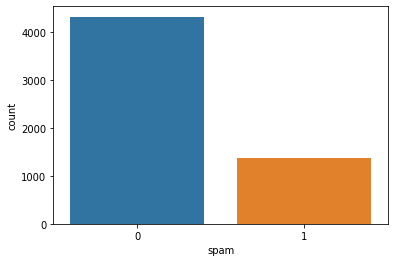

In [23]:
import seaborn as sns
sns.countplot(data['spam'], label='Count')

In [24]:
emails=data.copy()

In [25]:
emails.reset_index(inplace=True)

Removing subject: from each text

In [26]:
emails['text']=emails['text'].map(lambda text: text[8:])

In [27]:
emails.head()

,index,text,spam
0,121,re : ink prices got you down ? 11956 would y...,1
1,3701,thank you ! fyi from valeria . - - - - - - ...,0
2,128,"localized software , all languages available ...",1
3,860,perfect visual solution for your business now...,1
4,5063,summer intern we can hire the person as a su...,0


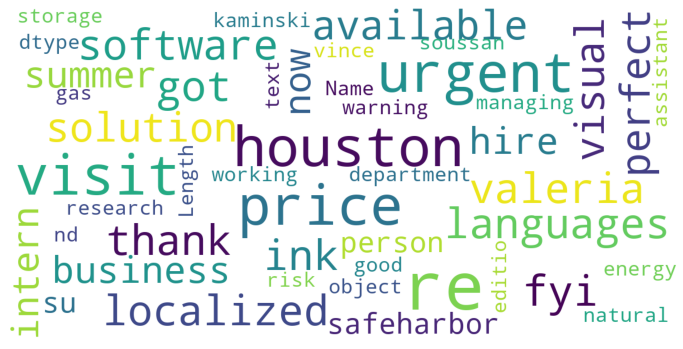

In [28]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopword = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopword,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(emails['text'])

In [29]:
spam = emails[emails['spam']==1]
not_spam = emails[emails['spam']==0]

Most used spam words

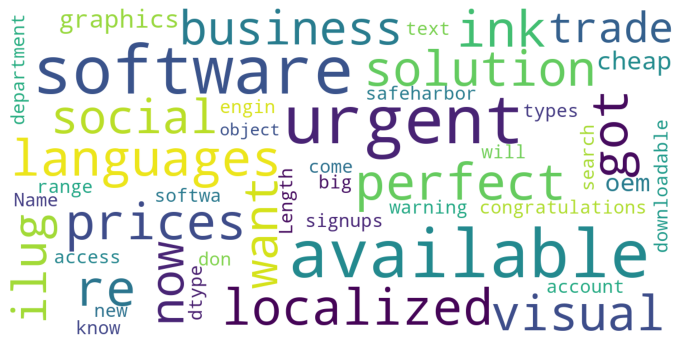

In [30]:
show_wordcloud(spam['text'])

Most used not spam words

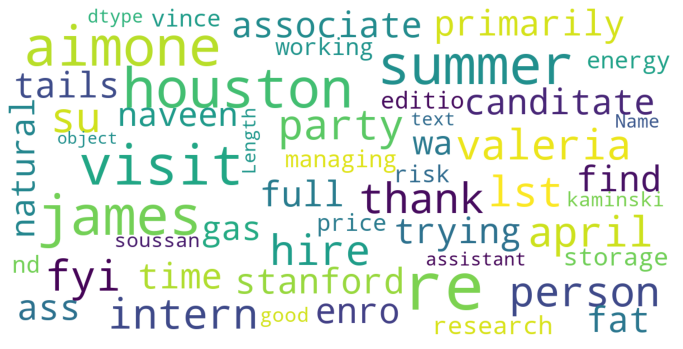

In [31]:
show_wordcloud(not_spam['text'])

#### Stemming

Cleaning the text and return the tokens. The cleaning of the text can be done by first removing punctuations and then removing the useless words also known as stop words. Then converting each word into its base form.(It may not have meaning)

In [32]:
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(emails)):
    review = re.sub('[^a-zA-Z]', ' ', emails['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [34]:
corpus[1]

'thank fyi valeria forward shirley crenshaw hou ect valeria stone exxon sprint com shirley crenshaw enron com cc subject thank date septemb stone v valeria viston america ext shirley crenshaw enron co shirlecl fpexmail subject thank dear shirley pleas forward thank note kevin kindal grant masson tanya tamarchenko vinc kaminski dear kevin grant tanya vinc want thank time share friday septemb th regard employ opportun enron enjoy meet discuss compani structur mission well object research group impress fast pace environ dedic display group appar group greatli contribut overal success enron look forward hear soon sincer valeria stone origin messag ext shirley crenshaw enron co sent thursday septemb stone v valeria subject inform exploratori interview enron research group valeria pm tomorrow th fine chang schedul littl bit believ work kevin kindal pm grant masson pm tanya tamarchenko pm vinc kaminski pm scenario upon arriv lobbi go secur desk ask meet lobbi th floor thank much flexibl shirl

## Train - Test Split

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(corpus,emails["spam"], test_size = 0.2, random_state = 42, stratify=emails['spam'])

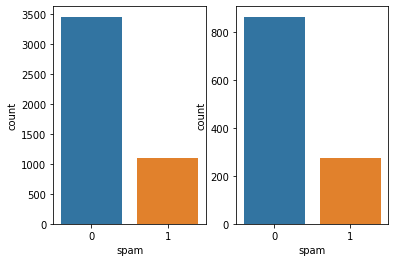

In [36]:
plt.subplot(1,2,1)
sns.countplot(y_train, label='Train Count')
plt.subplot(1,2,2)
sns.countplot(y_test, label='Test Count')

#### Count Vectorizer

Converting all the words into Bag of Words model i.e vector representation of a word.

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
vect_cv = CountVectorizer(stop_words='english')
vect_cv.fit(corpus)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [38]:
X_train_cv = vect_cv.transform(X_train)
X_test_cv = vect_cv.transform(X_test)

#### TF-IDF

Similar to count vectorizer but a bit of semantic information is stored in tf-idf.

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect_tfidf = TfidfVectorizer(stop_words='english')
vect_tfidf.fit(corpus)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [40]:
X_train_tfidf = vect_tfidf.transform(X_train)
X_test_tfidf = vect_tfidf.transform(X_test)

In [57]:
accuracies = {}

## Creating Model and Training

#### Naive Bayes Model training and testing

In [58]:
# Naive Bayes Machine Learning Model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_cv,y_train)
y_pred = nb.predict(X_test_cv)

              precision    recall  f1-score   support

         Ham       1.00      0.99      1.00       865
        Spam       0.98      0.99      0.99       274

    accuracy                           0.99      1139
   macro avg       0.99      0.99      0.99      1139
weighted avg       0.99      0.99      0.99      1139

Accuracy:  0.9929762949956101


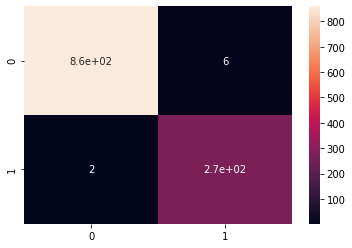

In [59]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test ,y_pred, target_names=['Ham', 'Spam'] ))
print('Accuracy: ', accuracy_score(y_test,y_pred))
accuracies['Naive Bayes CV'] = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)

In [60]:
# Naive Bayes Machine Learning Model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf,y_train)
y_pred = nb.predict(X_test_tfidf)

              precision    recall  f1-score   support

         Ham       0.88      1.00      0.93       865
        Spam       1.00      0.55      0.71       274

    accuracy                           0.89      1139
   macro avg       0.94      0.78      0.82      1139
weighted avg       0.91      0.89      0.88      1139

Accuracy:  0.8928884986830553


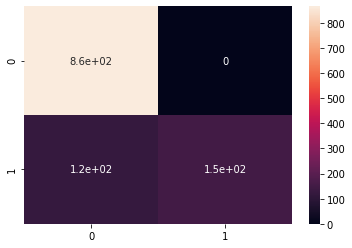

In [61]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test ,y_pred, target_names=['Ham', 'Spam'] ))
print('Accuracy: ', accuracy_score(y_test,y_pred))
accuracies['Naive Bayes TF-IDF'] = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)

#### SVM Model training and testing

In [62]:
from sklearn import svm
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train_cv,y_train)
y_pred = SVM.predict(X_test_cv)

              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       865
        Spam       0.96      0.95      0.96       274

    accuracy                           0.98      1139
   macro avg       0.97      0.97      0.97      1139
weighted avg       0.98      0.98      0.98      1139

Accuracy:  0.9798068481123793


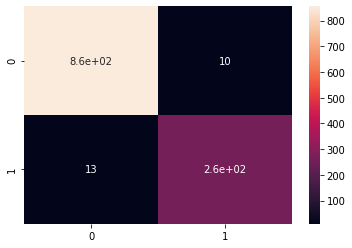

In [63]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test ,y_pred, target_names=['Ham', 'Spam'] ))
print('Accuracy: ', accuracy_score(y_test,y_pred))
accuracies['SVC CV'] = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)

In [64]:
from sklearn import svm
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train_tfidf,y_train)
y_pred = SVM.predict(X_test_tfidf)

              precision    recall  f1-score   support

         Ham       0.99      1.00      0.99       865
        Spam       1.00      0.96      0.98       274

    accuracy                           0.99      1139
   macro avg       0.99      0.98      0.99      1139
weighted avg       0.99      0.99      0.99      1139

Accuracy:  0.990342405618964


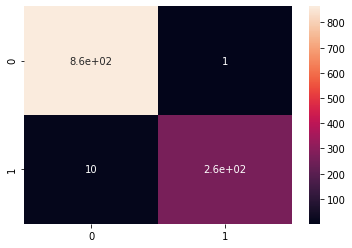

In [65]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test ,y_pred, target_names=['Ham', 'Spam'] ))
print('Accuracy: ', accuracy_score(y_test,y_pred))
accuracies['SVC TF-IDF'] = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)

Accuracy of all 4 cases

In [66]:
accuracies

{'Naive Bayes CV': 0.9929762949956101,
 'Naive Bayes TF-IDF': 0.8928884986830553,
 'SVC CV': 0.9798068481123793,
 'SVC TF-IDF': 0.990342405618964}

K-fold cross validation of top 2 models

In [67]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = nb, X = X_train_cv, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 98.77 %
Standard Deviation: 0.43 %


In [68]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = SVM, X = X_train_tfidf, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 99.17 %
Standard Deviation: 0.24 %


#### Hyperparameter Tuning

In [69]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = SVM,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train_tfidf, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 99.17 %
Best Parameters: {'C': 0.75, 'kernel': 'linear'}


In [ ]:
y_pred = grid_search.predict(X_test_tfidf)

              precision    recall  f1-score   support

         Ham       1.00      1.00      1.00       865
        Spam       0.99      0.99      0.99       274

    accuracy                           0.99      1139
   macro avg       0.99      0.99      0.99      1139
weighted avg       0.99      0.99      0.99      1139

Accuracy:  0.9938542581211589


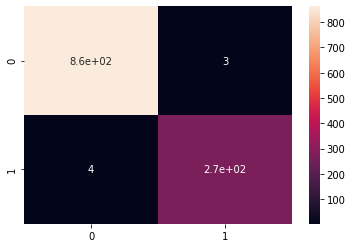

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test ,y_pred, target_names=['Ham', 'Spam'] ))
print('Accuracy: ', accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)

## Saving the best model

In [2]:
import pickle

In [ ]:
filename = 'model.pkl'
pickle.dump(grid_search, open(filename, 'wb'))

In [ ]:
pickle.dump(vect_tfidf, open('tranform.pkl', 'wb'))

## Prediction

In [10]:
vectorizer = pickle.load(open('tranform.pkl', 'rb'))

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [9]:
model = pickle.load(open('model.pkl', 'rb'))

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator SVC from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [12]:
prediction = model.predict(vectorizer.transform(['Hello']))

In [13]:
prediction

array([1])

In [8]:
if prediction[0]==0:
  print('Not Spam')
else:
  print('Spam')

Not Spam
